## [作業重點]
確保你了解隨機森林模型中每個超參數的意義，並觀察調整超參數對結果的影響

## 作業

作業1：試著調整 Random Forest 中的參數，並觀察是否會改變結果？   
作業2：改用其他資料集 (diabetes, wine)，仔細探索一個參數對模型預測力的變化。 

In [21]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


import pandas as pd
from sklearn import datasets, metrics
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import precision_score, recall_score, accuracy_score

import matplotlib.pyplot as plt

In [5]:
iris = datasets.load_iris()

In [7]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [102]:
X = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77)

rfc = RandomForestClassifier(
    n_estimators=50,
    max_depth=4
)

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

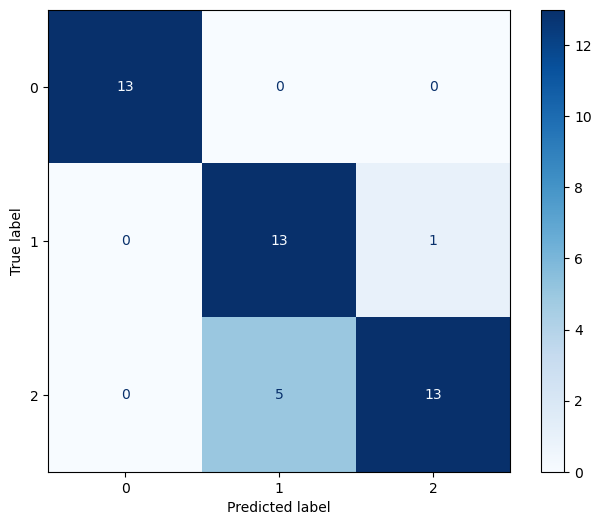

Accuracy: 0.8666666666666667
Precision: 0.8850088183421516
Recall: 0.8666666666666667


In [103]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
#                               display_labels=label
                             )
disp.plot(ax=ax, cmap='Blues')

plt.show(fig)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

-----
### 2

In [104]:
wine = datasets.load_wine()

In [105]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [106]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [107]:
df2 = pd.DataFrame(wine.data, columns=wine.feature_names)

df2.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [109]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [110]:
a_train, a_test, b_train, b_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=88)

In [120]:
rfc2 = RandomForestClassifier(
    n_estimators = 50,
    max_depth = 4,
)

rfc2.fit(a_train, b_train)

RandomForestClassifier(max_depth=4, n_estimators=50)

In [121]:
b_pred = rfc2.predict(a_test)

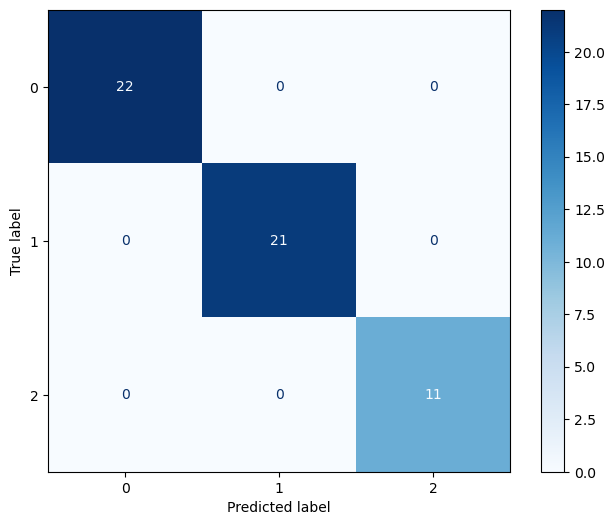

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [122]:
cm2 = confusion_matrix(b_test, b_pred)

fig2, ax2 = plt.subplots(figsize=(8, 6))
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, 
#                               display_labels=label
                             )
disp2.plot(ax=ax2, cmap='Blues')

plt.show(fig2)

# Accuracy
accuracy2 = accuracy_score(b_test, b_pred)

# Precision
precision2 = precision_score(b_test, b_pred, average='weighted')

# Recall
recall2 = recall_score(b_test, b_pred, average='weighted')

print(f'Accuracy: {accuracy2}')
print(f'Precision: {precision2}')
print(f'Recall: {recall2}')